In [195]:
import pandas as pd
import numpy as np
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import requests
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
#from selenium.webdriver.chrome.options import ChromeOptions
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
import time
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
### Url has already applied filter:

# Täby kommun, Solna kommun, Bromma kommun, Nacka kommun
# Villor, Par/kedjehus, lägenheter
# Minst 2,5 rum
# Minst 40 m2 yta
# Högst 3,5 miljoner kr
# Dölj nyproduktion
# Alla dagar på Hemnet


url = "https://www.hemnet.se/bostader?new_construction=exclude&price_max=3500000&living_area_min=40&rooms_min=2.5&item_types%5B%5D=villa&item_types%5B%5D=radhus&item_types%5B%5D=bostadsratt&location_ids%5B%5D=17793&location_ids%5B%5D=17853&location_ids%5B%5D=898740&location_ids%5B%5D=18028"
html = requests.get(url).content

###



In [197]:
key = "#huvudinnehall > section > div.hcl-flex--container.hcl-flex--justify-flex-start.hcl-flex--md-justify-space-between.SearchResultsHeader_tabsWrapper__mEAh9 > div:nth-child(1) > div > div:nth-child(1) > a > span.SearchTypeTabs_searchTypeTabDesktop__cOxjn"


containers = soup.select(key)

a = str([i.text.title() for i in containers])

pattern = r"\d+"
match = re.search(pattern, a)

total_objects = match[0]

total_pages = int(round(int(total_objects) / 50, 0))

In [212]:
### All Pages Loop ###

address_list = []
pris = []
sqm = []
rum = []
area = []
temp_lst = []
tags_lst = []



for x in range(1,total_pages + 1):
    
    l = f" {url}&page={x}'"
    options = Options()
    options.add_argument("--start-maximized")
    options.add_argument("--no-sandbox")
    options.add_argument('disable-notifications')

    driver = webdriver.Chrome(executable_path='C:\Program Files (x86)\chromedriver.exe')
    actions = ActionChains(driver)

    driver.get(l)
    
    time.sleep(5)  # Waiting for the page to load (not recommended)
    try:
        item = driver.execute_script('''return document.querySelector('div#usercentrics-root').shadowRoot.querySelector('button[data-testid="uc-accept-all-button"]')''')
        item.click()
        print('Clicked')
    except Exception as e:
        print(e)
        print('No click button')


    # Page Scroll
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Generate Soop
    soup = BeautifulSoup(driver.page_source, "lxml")
    
    ###
    
    key = '#huvudinnehall > div.hcl-grid.hcl-grid--columns-12.hcl-grid--gap-2.SearchResultsLayout_layoutWrapper__nsPUV > div.hcl-grid__item.hcl-grid__item-span-12.hcl-grid__item-lg-span-9.SearchResultsLayout_gridItem__SYbQ_ > div:nth-child(7)'
    
    containers = soup.select(key)
    
    ### Select address name
    
    for i in containers:
        
        a = i.select("div.Header_truncate__ebq7a")
        
        address_list.append([i.text.title() for i in a])
        

    ### Select pris, sqm, rum
    
    for i in containers:
    
        a = i.select(".ForSaleAttributes_primaryAttributes__tqSRJ")
    
        c = [i.text.replace('\xa0', '') for i in a]
    
    for i in c:
        
        if i.endswith("kr"):
            pris.append(i)  
        if i.endswith("m²"):
            sqm.append(i)
        if i.endswith("rum"):
            rum.append(i)
            
            
    ### Area
    
    for i in containers:
        
        a = i.select("div.Location_address___eOo4")
        
        area.append([i.text.title() for i in a])
        
     ## Tags
    
    divs = containers[0].select("div > div.Content_content__lg290")
    
    for i in divs:
        for j in i.select("div.Content_content__lg290 > div:nth-of-type(3)"):
            tags_lst.append(j.text)   
    # [j.text for i in divs for j in i.select("div.Content_content__lg290 > div:nth-of-type(3)")]    
        
    ### Links
    
       
    for i in containers:
        a = i.select("a")
    
    for b in a:
        temp_lst.append(b["href"])
        
        
links = []

for i in temp_lst:
    if i.startswith("/bostad/"):
        links.append("https://hemnet.se" + i)     
        


Clicked
Clicked
Clicked


In [217]:
addresses = [item for row in address_list for item in row]
areas = [item for row in area for item in row]

In [219]:
f_address = []

for i in addresses:
    f_address.append(i.replace(" ","+"))
    

f_area = []

for i in areas:
    f_area.append(i.replace(" ","+"))
    
gmaps_list = ["https://www.google.com/maps/place/" + a + "," + b + "," for a, b in zip(f_address, f_area)]

In [223]:
df = pd.DataFrame( {"Address": addresses, "Area": areas, "Price": pris, "Size": sqm, "Rooms": rum, "Tags": tags_lst, "HemnetLink":links, "GMapsLink": gmaps_list} )

In [224]:
df

,Address,Area,Price,Size,Rooms,Tags,HemnetLink,GMapsLink
0,Eskadervägen 46,"Näsby Park, Täby Kommun",2895000kr,70m²,3rum,PremiumBalkongHiss,https://hemnet.se/bostad/lagenhet-3rum-nasby-p...,https://www.google.com/maps/place/Eskadervägen...
1,Trefaldighetsvägen 14 E,"Gribbylund, Täby Kommun",2650000kr,"81,8m²",4rum,PremiumUteplats,https://hemnet.se/bostad/lagenhet-4rum-gribbyl...,https://www.google.com/maps/place/Trefaldighet...
2,Gribbylundsvägen 78A,"Gribbylund, Täby Kommun",2495000kr,84m²,4rum,PremiumBalkongHiss,https://hemnet.se/bostad/lagenhet-4rum-gribbyl...,https://www.google.com/maps/place/Gribbylundsv...
3,Meteorvägen 26,"Grindtorp, Täby Kommun",3295000kr,81m²,3rum,Balkong,https://hemnet.se/bostad/lagenhet-3rum-grindto...,https://www.google.com/maps/place/Meteorvägen+...
4,Regementsgatan 50,"Ritorp, Solna Kommun",3395000kr,"70,7m²",3rum,PremiumBalkong,https://hemnet.se/bostad/lagenhet-3rum-ritorp-...,https://www.google.com/maps/place/Regementsgat...
...,...,...,...,...,...,...,...,...
135,Spegelbacken 70,"Gribbylund, Täby Kommun",2695000kr,"120,5m²",5rum,Uteplats,https://hemnet.se/bostad/radhus-5rum-gribbylun...,https://www.google.com/maps/place/Spegelbacken...
136,Ugglevägen 2,"Ullna Strand, Täby Kommun",3495000kr,85m²,4rum,BalkongHiss,https://hemnet.se/bostad/lagenhet-4rum-ullna-s...,https://www.google.com/maps/place/Ugglevägen+2...
137,Hägernäsvägen 1A,"Hägernäs, Täby Kommun",2499000kr,89m²,4rum,Balkong,https://hemnet.se/bostad/lagenhet-4rum-hagerna...,https://www.google.com/maps/place/Hägernäsväge...
138,"Hagalundsgatan 22, 12 Tr","Hagalund, Solna Kommun",3400000kr,67m²,3rum,BalkongHiss,https://hemnet.se/bostad/lagenhet-3rum-hagalun...,https://www.google.com/maps/place/Hagalundsgat...


In [225]:
df[['Location', 'Kommun']] = df['Area'].apply(lambda x: pd.Series([x.split(', ')[0], x.split(', ')[1]]) if ',' in x else pd.Series([x, None]))

In [226]:
df["Price"] = df["Price"].str.replace("kr", "").astype(int)

In [227]:
df["Size"] = df["Size"].str.replace("m²", "").str.replace(",",".").astype(float)

In [228]:
df["Rooms"] = df["Rooms"].str.replace("rum", "").str.replace(",",".").astype(float)

In [229]:
df["Kommun"] = df["Kommun"].str.replace("Kommun", "")

In [230]:
df.head(3)

,Address,Area,Price,Size,Rooms,Tags,HemnetLink,GMapsLink,Location,Kommun
0,Eskadervägen 46,"Näsby Park, Täby Kommun",2895000,70.0,3.0,PremiumBalkongHiss,https://hemnet.se/bostad/lagenhet-3rum-nasby-p...,https://www.google.com/maps/place/Eskadervägen...,Näsby Park,Täby
1,Trefaldighetsvägen 14 E,"Gribbylund, Täby Kommun",2650000,81.8,4.0,PremiumUteplats,https://hemnet.se/bostad/lagenhet-4rum-gribbyl...,https://www.google.com/maps/place/Trefaldighet...,Gribbylund,Täby
2,Gribbylundsvägen 78A,"Gribbylund, Täby Kommun",2495000,84.0,4.0,PremiumBalkongHiss,https://hemnet.se/bostad/lagenhet-4rum-gribbyl...,https://www.google.com/maps/place/Gribbylundsv...,Gribbylund,Täby


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     144 non-null    object 
 1   Area        144 non-null    object 
 2   Price       144 non-null    int32  
 3   Size        144 non-null    float64
 4   Rooms       144 non-null    float64
 5   HemnetLink  144 non-null    object 
 6   GMapsLink   144 non-null    object 
 7   Location    144 non-null    object 
 8   Kommun      144 non-null    object 
dtypes: float64(2), int32(1), object(6)
memory usage: 9.7+ KB


In [234]:
df.loc[df["Rooms"] == 13].index[0]

109

In [120]:
df.drop(df.loc[df["Rooms"] == 13].index[0], axis=0, inplace= True)

In [122]:
df.reset_index(drop=True, inplace= True)

In [184]:
pd.DataFrame(df[["Rooms"]].value_counts())

,0
Rooms,
3.0,95
4.0,32
2.5,9
5.0,4
3.5,3


# DATA VIZ

In [160]:
palette = [
    '#aec6cf',  # Pastel Blue
    '#ffccd3',  # Pastel Red
    '#c9dfaf',  # Pastel Green
    '#d2b48c',  # Pastel Brown
    '#ffcc99',  # Pastel Orange
    '#ffb6c1'   # Pastel Pink
]


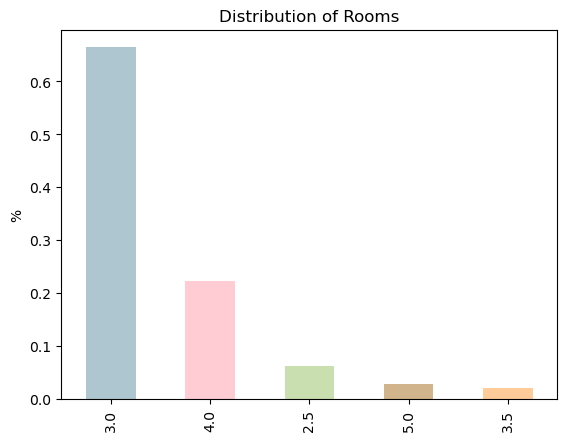

In [179]:
df["Rooms"].value_counts(normalize=True).plot(kind="bar", color = palette)

plt.title("Distribution of Rooms", fontsize= 12)
plt.ylabel("%")
plt.show()

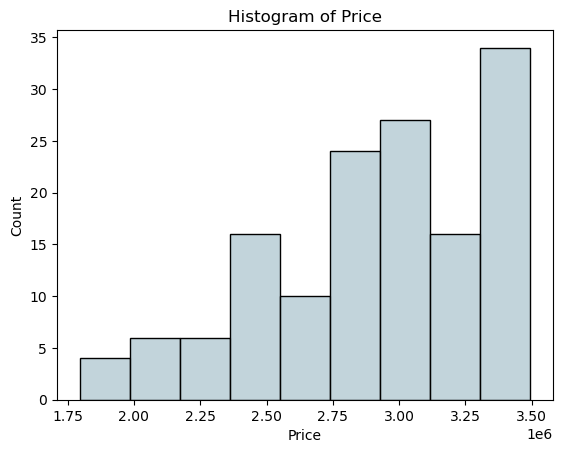

In [180]:
sns.histplot(data= df, x= "Price", color = palette[0])

plt.title("Histogram of Price", fontsize= 12)
plt.show()

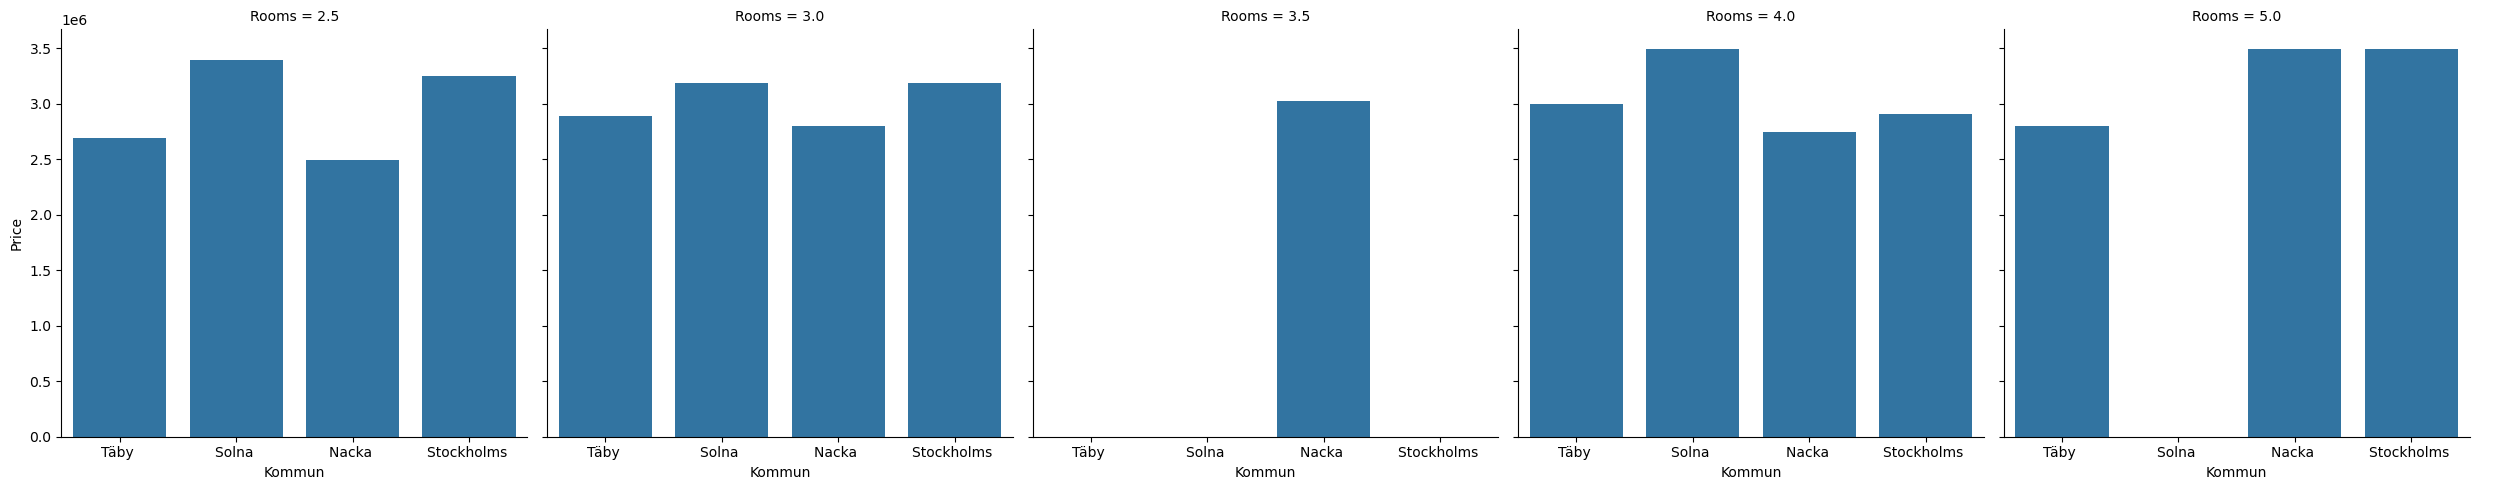

In [130]:
sns.catplot(data= df, x= "Kommun", y= "Price", kind= "bar", errorbar= None, estimator= "mean", col= "Rooms")

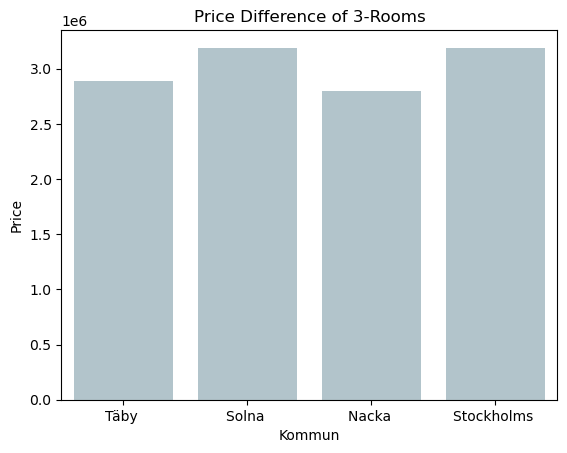

In [171]:
sns.barplot(data= df.loc[df["Rooms"] == 3.0], x="Kommun", y="Price", errorbar=None, color=palette[0])

plt.title("Price Difference of 3-Rooms", fontsize= 12)
plt.show()

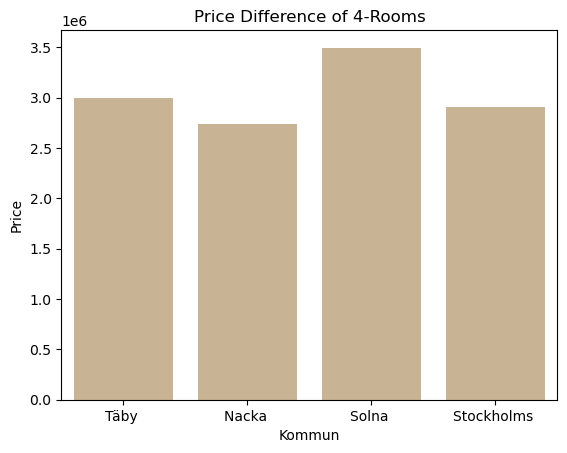

In [174]:
sns.barplot(data= df.loc[df["Rooms"] == 4.0], x="Kommun", y="Price", errorbar=None, color=palette[3])

plt.title("Price Difference of 4-Rooms", fontsize= 12)
plt.show()

<Axes: xlabel='Price', ylabel='Size'>

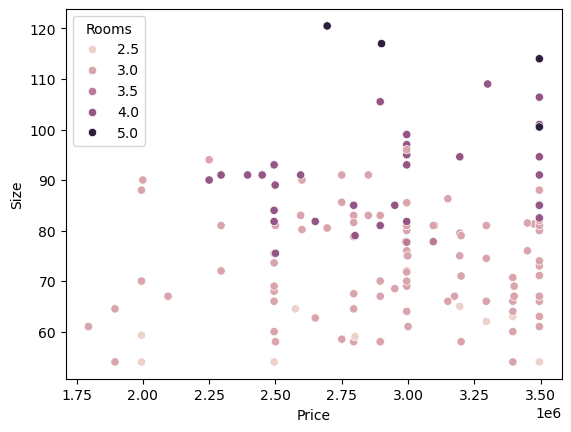

In [128]:
sns.scatterplot(data=df, x= "Price", y="Size", hue= "Rooms")

<Axes: >

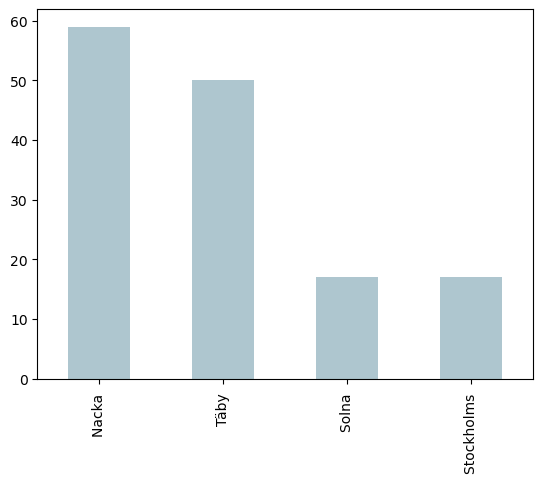

In [175]:
df["Kommun"].value_counts().plot(kind="bar", color=palette[0])